In [81]:
# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyIEEM.models.utils import initialize_SIR

In [95]:
country = 'SWE'
spatial = False
age_classes = pd.IntervalIndex.from_tuples([(0,5),(5,10),(10,15),(15,20),(20,25),(25,30),(30,35),(35,40),(40,45),(45,50),(50,55),(55,60),(60,65),(65,70),(70,75),(75,80),(80,120)], closed='left')
#age_classes = pd.IntervalIndex.from_tuples([(0,20),(20,40),(40,60),(60,80),(80,120),], closed='left')
model = initialize_SIR(country, age_classes, spatial=spatial)

In [96]:
np.sum(np.mean(model.parameters['N']['work'], axis=0))

15.522743121607064

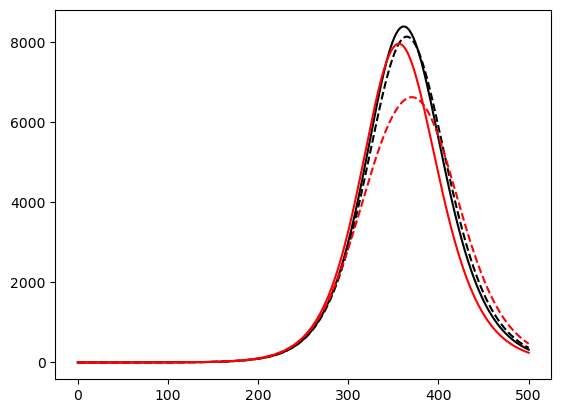

In [86]:
fig,ax = plt.subplots()

for i, (spatial, country) in enumerate(zip([True, False, True, False],['BE', 'BE', 'SWE', 'SWE'])):
    # load model
    model = initialize_SIR(country, age_classes, spatial=spatial)
    # sim model
    out=model.sim(500, method='DOP853', rtol=1e-4)
    # quick and dirty linestyle/color
    if country == 'BE':
        color = 'black'
    else:
        color = 'red'
    if spatial == False:
        linestyle = '-'
    else:
        linestyle = '--'
    # visualize
    ax.plot(out.time,out.I.sum(dim=['age_class', 'spatial_unit']), color=color, linestyle=linestyle)
    
plt.show()
plt.close()